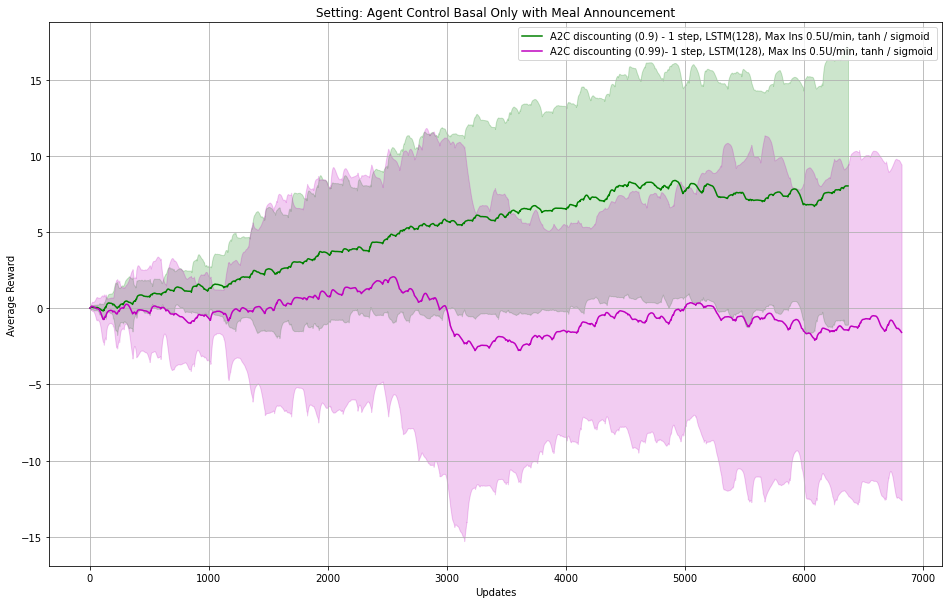

In [387]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import json
%matplotlib inline

USE_A2C = True
USE_SAC = False

PATH = '../results/a2c_5_step_0/args.json'
with open(PATH) as json_file:
    data = json.load(json_file)
seeds = data['seeds']
experiment_path = '/Users/chirathhettiarachchi/RL/phd/sys_control/results/'


def get_avgRewards(path, seeds):
    cur_length = []
    avg_rewards = []
    refined = []
    FILES = [ path + str(seed)+'.csv' for seed in seeds]
    for file in FILES:
        reward_summary = pd.read_csv(file)
        cur_length.append(reward_summary.shape[0])
        avg_rewards.append(reward_summary)
    for x in avg_rewards:
        refined.append(x[0:min(cur_length)])
    data = pd.concat(refined, axis=1)
    data['mean'] = data.mean(axis=1)
    data['std_dev'] = data.std(axis=1)
    return data


fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111)

if USE_A2C:
    
    path_a2c = '../results/exp11/avg_reward_summary_'
    a2c_data = get_avgRewards(path_a2c, seeds)
    a2c_mstd = a2c_data['std_dev']
    a2c_ma = a2c_data['mean'] 
    ax.plot(a2c_ma, '-g', label="A2C discounting (0.9) - 1 step, LSTM(128), Max Ins 0.5U/min, tanh / sigmoid")
    ax.fill_between(a2c_mstd.index, a2c_ma - 2 * a2c_mstd, a2c_ma + 2 * a2c_mstd, color="g", alpha=0.2)
    
    path_a2c = '../results/exp9/avg_reward_summary_'
    a2c_data = get_avgRewards(path_a2c, seeds)
    a2c_mstd = a2c_data['std_dev']
    a2c_ma = a2c_data['mean'] 
    ax.plot(a2c_ma, '-m', label="A2C discounting (0.99)- 1 step, LSTM(128), Max Ins 0.5U/min, tanh / sigmoid")
    ax.fill_between(a2c_mstd.index, a2c_ma - 2 * a2c_mstd, a2c_ma + 2 * a2c_mstd, color="m", alpha=0.2)
    
#     path_a2c = '../results/exp10/avg_reward_summary_'
#     a2c_data = get_avgRewards(path_a2c, seeds)
#     a2c_mstd = a2c_data['std_dev']
#     a2c_ma = a2c_data['mean'] 
#     ax.plot(a2c_ma, '-m', label="A2C discounting (0.99)- 5 step, LSTM(128), Max Ins 0.5U/min, tanh / sigmoid")
#     ax.fill_between(a2c_mstd.index, a2c_ma - 2 * a2c_mstd, a2c_ma + 2 * a2c_mstd, color="m", alpha=0.2)
    
if USE_SAC:
    path_sac = '../results/sac_test_1/avg_reward_summary_'
    sac_data = get_avgRewards(path_sac, seeds)
    sac_mstd = sac_data['std_dev']
    sac_ma = sac_data['mean']
    ax.plot(sac_ma, '-b')
    ax.fill_between(sac_mstd.index, sac_ma - 2 * sac_mstd, sac_ma + 2 * sac_mstd, color="b", alpha=0.2)

ax.grid()
ax.set_title('Setting: Agent Control Basal Only with Meal Announcement')
ax.set_xlabel('Updates')
ax.set_ylabel('Average Reward')
ax.legend(loc="upper right")

#plt.xlim(0, 4000)
plt.show()

filename = 'jupyter_summary.png'
fig.savefig(experiment_path + '/' + filename)


In [306]:
path = '../results/exp9/avg_reward_summary_0.csv'
reward_summary = pd.read_csv(path)

glucose = reward_summary['glucose']
action = reward_summary['action']
prob = reward_summary['prob']
state_value = reward_summary['state_value']
action_mean = reward_summary['mean']

ax.plot(action, '-b')
ax.plot(mean, '-r')
ax.set_title('Average Rewards vs Steps')
ax.set_xlabel('Steps')
ax.set_ylabel('Metric')
plt.show()




KeyError: 'glucose'